# Resolución Tarea 1A
**Autores:** Taboada Agustin, Montenegro Luis, Mendoza Cristiany  Stauber Daniela

### Nota importante
A partir de ahora utilizaremos el paquete `DifferentialEquations`, que tiene ya implementados los integradores de Euler, Runge-Kutta, y otros. Haga todos los ejercicios utilizando este paquete.

In [2]:
using DifferentialEquations

## Problema 1
En el directorio `Dipolo_mag_3d` encontrará un notebook de Julia que realiza una integración de una partícula cargada en presencia de un dipolo magnético. Este notebook utiliza `DifferentialEquations` para resolver dicho problema. Juegue con las soluciones y la librería, y trate de entender cómo funciona. Ejecute distintas condiciones initiales, cambie las tolerancias, cambie los métodos, etc. La idea es únicamente que se familiarize con el paquete, no hace falta que presente nada respecto a este ejercicio.


*Nota: si quiere probar otros métodos además de Euler y Runge Kutta, puede consultar los métodos disponibles en el paquete en 
https://diffeq.sciml.ai/stable/solvers/ode_solve/*

*Puede consultar también https://diffeq.sciml.ai/stable/tutorials/ode_example/ para un pequeño tutorial del paquete.*

## Problema 2
**Estabilidad numérica**

***2a)***
Volvamos nuevamente la ecuación del notebook anterior

$$
\frac{dy}{dt} = \lambda y
$$

Resuelva la ecuación con $\lambda = -1$ en el intervalo temporal $[0,20]$, con $N = 100, 50, 30, 20, 10, 5$ (es decir, para $\Delta t$ creciente). Experimente nuevamente con Euler y Runge-Kutta y grafique. ¿Qué observa?

*Nota: utilice en la función `solve` los argumentos opcionales `saveat = dt` y `adaptive = false`.
Ejemplo:*
```julia
sol = solve(prob, RK4(), dt = dt, saveat = dt, adaptive = false)
```
*Puede averiguar más sobre estas opciones en https://diffeq.sciml.ai/stable/basics/common_solver_opts/ o preguntar en clases o en el aula virtual.*

In [3]:
#Definimos lo que necesitamos para nuestro problema
CrecimientoExponencial(y, t, λ) =-1. *(y) 
u0 =1.0 #Datos iniciales
T=20.
tspan = (0.0,T)

prob = ODEProblem(CrecimientoExponencial,u0,tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 20.0)
u0: 1.0

In [4]:
#Varios pasos y distintos dt
N=[5,10,20,30,50,100,200,300]
dt=T ./N

8-element Vector{Float64}:
 4.0
 2.0
 1.0
 0.6666666666666666
 0.4
 0.2
 0.1
 0.06666666666666667

***Euler***

In [5]:
sol1= solve(prob,  Euler(), dt = dt[1], saveat = dt, adaptive = false)
sol2= solve(prob,  Euler(), dt = dt[2], saveat = dt, adaptive = false)
sol3= solve(prob,  Euler(), dt = dt[3], saveat = dt, adaptive = false)
sol4= solve(prob,  Euler(), dt = dt[4], saveat = dt, adaptive = false)
sol5= solve(prob,  Euler(), dt = dt[5], saveat = dt, adaptive = false)
sol6= solve(prob,  Euler(), dt = dt[6], saveat = dt, adaptive = false)
sol7= solve(prob,  Euler(), dt = dt[7], saveat = dt, adaptive = false)
sol8= solve(prob,  Euler(), dt = dt[8], saveat = dt, adaptive = false)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be

retcode: Success
Interpolation: 1st order linear
t: 8-element Vector{Float64}:
 0.06666666666666667
 0.1
 0.2
 0.4
 0.6666666666666666
 1.0
 2.0
 4.0
u: 8-element Vector{Float64}:
 0.9333333333333333
 0.9017037037037038
 0.8130370370370371
 0.6610292235939642
 0.5016118252560146
 0.35526436649414417
 0.1262127701004856
 0.01592966333643813

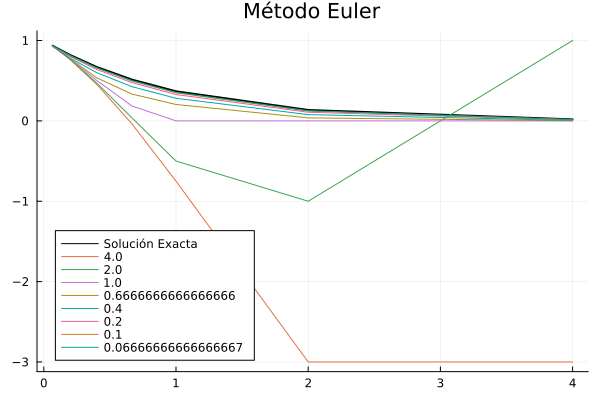

In [6]:
using Plots
gr()
plt = plot()
plot!(plt, sol8.t, u0*exp.(-1. *sol8.t), label = "Solución Exacta", lw=2, color= :black)
plot!(plt, sol1.t, sol1.u, label = string(dt[1]), title= "Método Euler")
plot!(plt, sol2.t, sol2.u, label = string(dt[2]))
plot!(plt, sol3.t, sol3.u, label = string(dt[3]))
plot!(plt, sol4.t, sol4.u, label = string(dt[4]))
plot!(plt, sol5.t, sol5.u, label = string(dt[5]))
plot!(plt, sol6.t, sol6.u, label = string(dt[6]))
plot!(plt, sol7.t, sol7.u, label = string(dt[7]))
plot!(plt, sol8.t, sol8.u, label = string(dt[8]))
plot!(plt, legend = :bottomleft)

***Heun***

In [8]:
solH1= solve(prob,  Heun(), dt = dt[1], saveat = dt, adaptive = false)
solH2= solve(prob,  Heun(), dt = dt[2], saveat = dt, adaptive = false)
solH3= solve(prob,  Heun(), dt = dt[3], saveat = dt, adaptive = false)
solH4= solve(prob,  Heun(), dt = dt[4], saveat = dt, adaptive = false)
solH5= solve(prob,  Heun(), dt = dt[5], saveat = dt, adaptive = false)
solH6= solve(prob,  Heun(), dt = dt[6], saveat = dt, adaptive = false)
solH7= solve(prob,  Heun(), dt = dt[7], saveat = dt, adaptive = false)
solH8= solve(prob, Heun(), dt = dt[8], saveat = dt, adaptive = false)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be

retcode: Success
Interpolation: 1st order linear
t: 8-element Vector{Float64}:
 0.06666666666666667
 0.1
 0.2
 0.4
 0.6666666666666666
 1.0
 2.0
 4.0
u: 8-element Vector{Float64}:
 0.9355555555555556
 0.9049074485596709
 0.8188582825788753
 0.6705288869480249
 0.5136837420062562
 0.36816604393548247
 0.13554623590710355
 0.018372782068584278

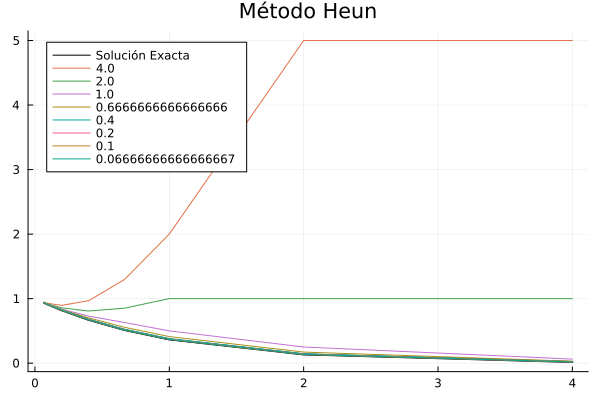

In [9]:
using Plots
gr()
plt = plot()
plot!(plt, solH8.t, u0*exp.(-1. *solH8.t), label = "Solución Exacta",lw=2, color= :black)
plot!(plt, solH1.t, solH1.u, label = string(dt[1]), title= "Método Heun")
plot!(plt, solH2.t, solH2.u, label = string(dt[2]))
plot!(plt, solH3.t, solH3.u, label = string(dt[3]))
plot!(plt, solH4.t, solH4.u, label = string(dt[4]))
plot!(plt, solH5.t, solH5.u, label = string(dt[5]))
plot!(plt, solH6.t, solH6.u, label = string(dt[6]))
plot!(plt, solH7.t, solH7.u, label = string(dt[7]))
plot!(plt, solH8.t, solH8.u, label = string(dt[8]))
plot!(plt, legend = :topleft)

***RK4***

In [10]:
solRK41= solve(prob,  RK4(), dt = dt[1], saveat = dt, adaptive = false)
solRK42= solve(prob,  RK4(), dt = dt[2], saveat = dt, adaptive = false)
solRK43= solve(prob,  RK4(), dt = dt[3], saveat = dt, adaptive = false)
solRK44= solve(prob,  RK4(), dt = dt[4], saveat = dt, adaptive = false)
solRK45= solve(prob,  RK4(), dt = dt[5], saveat = dt, adaptive = false)
solRK46= solve(prob,  RK4(), dt = dt[6], saveat = dt, adaptive = false)
solRK47= solve(prob,  RK4(), dt = dt[7], saveat = dt, adaptive = false)
solRK48= solve(prob, RK4(), dt = dt[8], saveat = dt, adaptive = false)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be

retcode: Success
Interpolation: 1st order linear
t: 8-element Vector{Float64}:
 0.06666666666666667
 0.1
 0.2
 0.4
 0.6666666666666666
 1.0
 2.0
 4.0
u: 8-element Vector{Float64}:
 0.9355069958847737
 0.9048373871459353
 0.8187307815731597
 0.6703200926953968
 0.5134171785959778
 0.3678795051899904
 0.1353353303388322
 0.018315651637920937

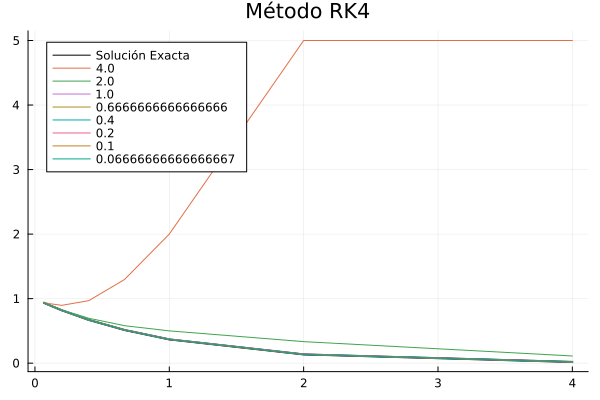

In [11]:
using Plots
gr()
plt = plot()
plot!(plt, solRK48.t, u0*exp.(-1. *solH8.t), label = "Solución Exacta", lw=2, color= :black)
plot!(plt, solRK41.t, solRK41.u, label = string(dt[1]), title= "Método RK4")
plot!(plt, solRK42.t, solRK42.u, label = string(dt[2]))
plot!(plt, solRK43.t, solRK43.u, label = string(dt[3]))
plot!(plt, solRK44.t, solRK44.u, label = string(dt[4]))
plot!(plt, solRK45.t, solRK45.u, label = string(dt[5]))
plot!(plt, solRK46.t, solRK46.u, label = string(dt[6]))
plot!(plt, solRK47.t, solRK47.u, label = string(dt[7]))
plot!(plt, solRK48.t, solRK48.u, label = string(dt[8]))
plot!(plt, legend = :topleft)

***2b)*** Use el notebook *region_de_estabilidad* para investigar la región de convergencia de varios métodos de las librerías. Simplemente lea el notebook, entiéndalo, y corra los ejemplos, no hace falta que agregue nada. Pregunte en clase todas sus dudas.

## Problema 3
Construya su propio código para su ecuación favorita (alguna que no sea muy complicada, en la página del paquete DifferentialEquations de Julia hay varios ejemplos, o puede usar el dipolo 2D (orbitas coplanares)). Evolucione con distintas tolerancias, con paso fijo (vea como se hace esto en cada caso, use métodos fijos o adaptativos). Grafique diferencias de soluciones con distinta resolución o tolerancia y/o con distintos datos iniciales muy próximos.
Estudie convergencia, encuentre soluciones con distintos pasos (fijos), haga los cocientes y grafique el factor $Q$.

In [12]:
#Función auxiliar para calcular el factor Q.
#Simplemente calcule tres soluciones con distintos dt
#Si sol_1 usa N+1 puntos, sol_2 debe usar 2N+1 y sol4 usar 4N+1.
#No olvide utilizar `adaptive = false` y `saveat = dt` 
using LinearAlgebra

function Q(t,sol_1,sol_2,sol_4)
    return norm(sol_1(t)[:] - sol_2(t)[1:2:end],2)/norm(sol_2(t)[1:2:end]-sol_4(t)[1:4:end],2)
end

Q (generic function with 1 method)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355


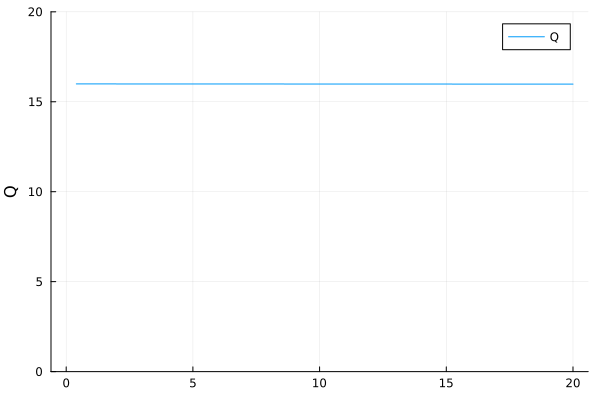

In [13]:
#Ejemplo simple
using Plots
λ = -im
T = (0.0,20.0)
N = 51
dt = (T[2]-T[1])/(N-1)
function CrecimientoExponencial!(du, u, par, t)
    λ = par
    du .= λ*u
end
y0 = [1.0+ 1.0im]
prob = ODEProblem(CrecimientoExponencial!,y0,T,λ);
#t = T[1]:dt:T[2]

sol_1 = solve(prob, RK4(), dt = dt  , saveat = dt,   adaptive = false);
sol_2 = solve(prob, RK4(), dt = dt/2, saveat = dt/2, adaptive = false);
sol_4 = solve(prob, RK4(), dt = dt/4, saveat = dt/4, adaptive = false);
plot(sol_1.t,map(t -> Q(t,sol_1,sol_2,sol_4),sol_1.t), yaxis=("Q",(0.,20)), label="Q")

In [12]:
sol_1(0.0)[:]

1-element Vector{ComplexF64}:
 1.0 + 1.0im

###  Van der Pol Equations ###
 El oscilador de van der Pol es un oscilador con amortiguamiento no lineal. Su evolución temporal obedece a una ecuación diferencial de segundo orden:
\begin{equation}
\frac{dx^2}{dt^2} -\mu(1-x^2)\frac{dx}{dt}+x=0
\end{equation}
Cuya forma bidimensional es
\begin{equation}
\frac{dx}{dt}= y
\end{equation}
\begin{equation}
\frac{dy}{dt}=\mu ((1-x^2)y-x)
\end{equation}

In [14]:
#Datos iniciales
u0= [0.0, sqrt(3)]
μ=1.

1.0

In [15]:
function f(du, u, μ, t)   #Definimos f(u) de la ode 
    x=u[1]
    y=u[2]
    
    du[1] =y
    du[2] = μ*((1. -x^2)*y-x)
end


f (generic function with 1 method)

In [16]:
T=20.
tspan = (0.0,T)
dt=T/400
prob3 = ODEProblem(f,u0,tspan,μ)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 20.0)
u0: 2-element Vector{Float64}:
 0.0
 1.7320508075688772

#### Jugamos con el problema

In [17]:
solE=solve(prob3, Euler(), adaptive = false,  dt = dt,saveat = dt)
sol33=solve(prob3, SSPRK33(), adaptive = false,  dt = dt,saveat = dt)
solMind=solve(prob3, Midpoint(), adaptive = false,  dt = dt,saveat = dt)
solRK4=solve(prob3, RK4(),  dt = dt ,saveat = dt, adaptive = false)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be

retcode: Success
Interpolation: 1st order linear
t: 401-element Vector{Float64}:
  0.0
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35
  0.4
  0.45
  0.5
  0.55
  0.6
  ⋮
 19.45
 19.5
 19.55
 19.6
 19.65
 19.7
 19.75
 19.8
 19.85
 19.9
 19.95
 20.0
u: 401-element Vector{Vector{Float64}}:
 [0.0, 1.7320508075688772]
 [0.08876427402228546, 1.8183808092657257]
 [0.1818083804259229, 1.9029081504395542]
 [0.2789873363308459, 1.9833489560452506]
 [0.38002833150887716, 2.0568734248186415]
 [0.48450382421121674, 2.1201322448331275]
 [0.5918077702799365, 2.16935943739056]
 [0.7011393578305357, 2.2005724835604044]
 [0.8114994080403629, 2.209878768028531]
 [0.9217045438747576, 2.1938753002462086]
 [1.0304228435398899, 2.1500984916841936]
 [1.1362317470808916, 2.0774501676856434]
 [1.2376947518938608, 1.9765074964542677]
 ⋮
 [-0.7751059232059532, 1.366193398944488]
 [-0.7051021139908095, 1.434843247696613]
 [-0.6315305819470595, 1.5089523480565543]
 [-0.5541114708113191, 1.5887825244670921]
 [-0.4725

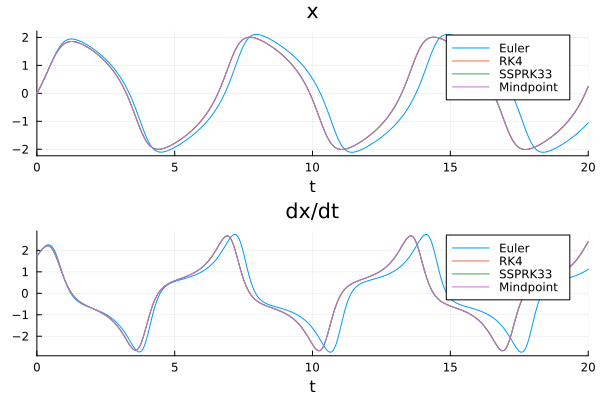

In [18]:
plot(solE,layout=(2,1),label=[" Euler" " Euler"], title=["x" "dx/dt"] )
plot!(solRK4,layout=(2,1),label=[" RK4" " RK4"])
plot!(sol33,layout=(2,1),label=[" SSPRK33" " SSPRK33"])
plot!(solMind,layout=(2,1),label=[" Mindpoint" " Mindpoint"])

In [19]:
function Q(t,sol_1,sol_2,sol_4)
    return norm(sol_1(t)[:,:] - sol_2(t)[:,:],2)/norm(sol_2(t)[:,:]-sol_4(t)[:,:],2)
end

Q (generic function with 1 method)

In [20]:
solE2=solve(prob3, Euler(), adaptive = false,  dt = dt*0.5,saveat = dt)
solE4=solve(prob3, Euler(), adaptive = false,  dt = dt*0.25,saveat = dt)

sol332=solve(prob3, SSPRK33(), adaptive = false,  dt = dt*0.5,saveat = dt)
sol334=solve(prob3, SSPRK33(), adaptive = false,  dt = dt*0.25,saveat = dt)

solMind2=solve(prob3, Midpoint(), adaptive = false,  dt = dt*0.5,saveat = dt)
solMind4=solve(prob3, Midpoint(), adaptive = false,  dt = dt*0.25,saveat = dt)

solRK42=solve(prob3, RK4(),  dt = dt*0.5,saveat = dt, adaptive = false)
solRK44=solve(prob3, RK4(),  dt = dt*0.25,saveat = dt, adaptive = false)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be

retcode: Success
Interpolation: 1st order linear
t: 401-element Vector{Float64}:
  0.0
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35
  0.4
  0.45
  0.5
  0.55
  0.6
  ⋮
 19.45
 19.5
 19.55
 19.6
 19.65
 19.7
 19.75
 19.8
 19.85
 19.9
 19.95
 20.0
u: 401-element Vector{Vector{Float64}}:
 [0.0, 1.7320508075688772]
 [0.08876424805606875, 1.818380813623317]
 [0.18180832780687878, 1.9029081435472555]
 [0.27898725999437834, 1.983348913523482]
 [0.3800282401258554, 2.0568733122088143]
 [0.4845037343473721, 2.1201320175289764]
 [0.5918077078711789, 2.1693590426353104]
 [0.701139357906655, 2.200571865308483]
 [0.8114995115603456, 2.209877875123845]
 [0.921704791038969, 2.193874097538561]
 [1.030423264178414, 2.150096972314512]
 [1.1362323504154923, 2.077448363070743]
 [1.2376955193043628, 1.976505479329363]
 ⋮
 [-0.7750858623128858, 1.3662128659478605]
 [-0.7050810372175618, 1.4348642867822594]
 [-0.6315084097984492, 1.5089750544090428]
 [-0.5540881204547777, 1.58880697011772]
 [-0.472529702734

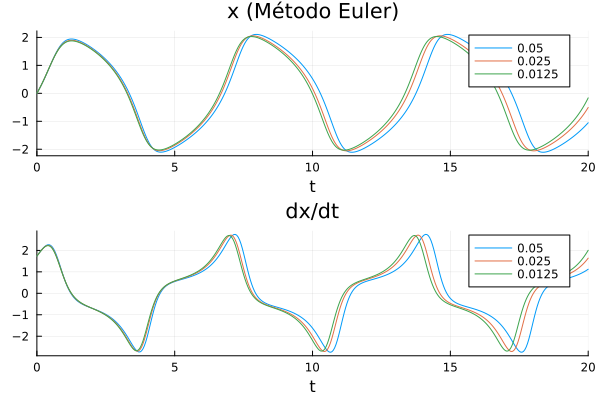

In [21]:
#Aquí graficamos la solución numerica con el método de Euler para distintos pasos
plot(solE,layout=(2,1),label=[string(dt) string(dt)], title =["x (Método Euler)" "dx/dt"])
plot!(solE2,layout=(2,1),label=[string(dt*0.5) string(dt*0.5)])
plot!(solE4,layout=(2,1),label=[string(dt*0.25) string(dt*0.25)])

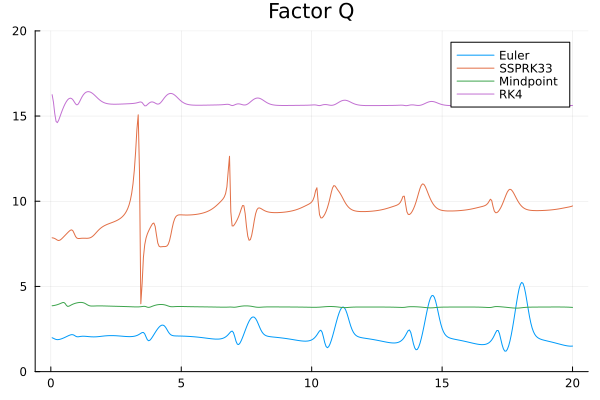

In [22]:
plot(solE.t,map(t -> Q(t,solE,solE2,solE4),solE.t),ylim=(0.0,20.), label="Euler",title= "Factor Q")
plot!(sol33.t,map(t -> Q(t,sol33,sol332,sol334),sol33.t), label="SSPRK33")
plot!(solMind.t,map(t -> Q(t,solMind,solMind2,solMind4),solMind.t), label="Mindpoint")
plot!(solRK4.t,map(t -> Q(t,solRK4,solRK42,solRK44),solRK4.t), label="RK4")


#### Probamos distintas tolerancias 

In [22]:
solE_tol=solve(prob3, Euler(), adaptive = false,  dt = dt,saveat = dt ,reltol=1e-8,abstol=1e-8)
sol33_tol=solve(prob3, SSPRK33(), adaptive = false,  dt = dt,saveat = dt,reltol=1e-8,abstol=1e-8)
solMind_tol=solve(prob3, Midpoint(), adaptive = false,  dt = dt,saveat = dt ,reltol=1e-8,abstol=1e-8)
solRK4_tol=solve(prob3, RK4(),  dt = dt ,saveat = dt, adaptive = false,reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: 1st order linear
t: 401-element Vector{Float64}:
  0.0
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35
  0.4
  0.45
  0.5
  0.55
  0.6
  ⋮
 19.45
 19.5
 19.55
 19.6
 19.65
 19.7
 19.75
 19.8
 19.85
 19.9
 19.95
 20.0
u: 401-element Vector{Vector{Float64}}:
 [0.0, 1.7320508075688772]
 [0.08876427402228546, 1.8183808092657257]
 [0.1818083804259229, 1.9029081504395542]
 [0.2789873363308459, 1.9833489560452506]
 [0.38002833150887716, 2.0568734248186415]
 [0.48450382421121674, 2.1201322448331275]
 [0.5918077702799365, 2.16935943739056]
 [0.7011393578305357, 2.2005724835604044]
 [0.8114994080403629, 2.209878768028531]
 [0.9217045438747576, 2.1938753002462086]
 [1.0304228435398899, 2.1500984916841936]
 [1.1362317470808916, 2.0774501676856434]
 [1.2376947518938608, 1.9765074964542677]
 ⋮
 [-0.7751059232059532, 1.366193398944488]
 [-0.7051021139908095, 1.434843247696613]
 [-0.6315305819470595, 1.5089523480565543]
 [-0.5541114708113191, 1.5887825244670921]
 [-0.4725

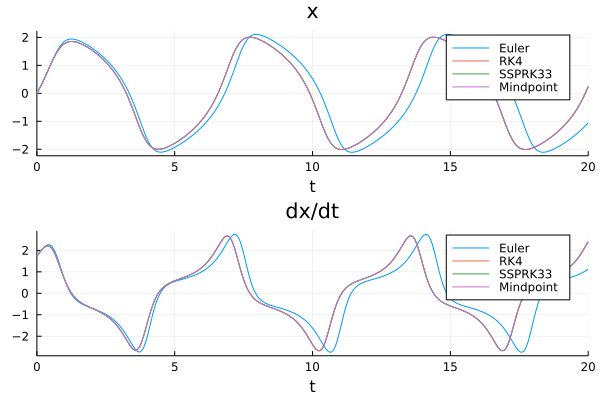

In [23]:
plot(solE_tol,layout=(2,1),label=[" Euler" " Euler"], title=["x" "dx/dt"] )
plot!(solRK4_tol,layout=(2,1),label=[" RK4" " RK4"])
plot!(sol33_tol,layout=(2,1),label=[" SSPRK33" " SSPRK33"])
plot!(solMind_tol,layout=(2,1),label=[" Mindpoint" " Mindpoint"])

In [24]:
solE2_tol=solve(prob3, Euler(), adaptive = false,  dt = dt*0.5,saveat = dt ,reltol=1e-8,abstol=1e-8)
solE4_tol=solve(prob3, Euler(), adaptive = false,  dt = dt*0.25,saveat = dt,reltol=1e-8,abstol=1e-8)

sol332_tol=solve(prob3, SSPRK33(), adaptive = false,  dt = dt*0.5,saveat = dt,reltol=1e-8,abstol=1e-8)
sol334_tol=solve(prob3, SSPRK33(), adaptive = false,  dt = dt*0.25,saveat = dt,reltol=1e-8,abstol=1e-8)

solMind2_tol=solve(prob3, Midpoint(), adaptive = false,  dt = dt*0.5,saveat = dt,reltol=1e-8,abstol=1e-8)
solMind4_tol=solve(prob3, Midpoint(), adaptive = false,  dt = dt*0.25,saveat = dt,reltol=1e-8,abstol=1e-8)

solRK42_tol=solve(prob3, RK4(),  dt = dt*0.5,saveat = dt, adaptive = false,reltol=1e-8,abstol=1e-8)
solRK44_tol=solve(prob3, RK4(),  dt = dt*0.25,saveat = dt, adaptive = false,reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: 1st order linear
t: 401-element Vector{Float64}:
  0.0
  0.05
  0.1
  0.15
  0.2
  0.25
  0.3
  0.35
  0.4
  0.45
  0.5
  0.55
  0.6
  ⋮
 19.45
 19.5
 19.55
 19.6
 19.65
 19.7
 19.75
 19.8
 19.85
 19.9
 19.95
 20.0
u: 401-element Vector{Vector{Float64}}:
 [0.0, 1.7320508075688772]
 [0.08876424805606875, 1.818380813623317]
 [0.18180832780687878, 1.9029081435472555]
 [0.27898725999437834, 1.983348913523482]
 [0.3800282401258554, 2.0568733122088143]
 [0.4845037343473721, 2.1201320175289764]
 [0.5918077078711789, 2.1693590426353104]
 [0.701139357906655, 2.200571865308483]
 [0.8114995115603456, 2.209877875123845]
 [0.921704791038969, 2.193874097538561]
 [1.030423264178414, 2.150096972314512]
 [1.1362323504154923, 2.077448363070743]
 [1.2376955193043628, 1.976505479329363]
 ⋮
 [-0.7750858623128858, 1.3662128659478605]
 [-0.7050810372175618, 1.4348642867822594]
 [-0.6315084097984492, 1.5089750544090428]
 [-0.5540881204547777, 1.58880697011772]
 [-0.472529702734

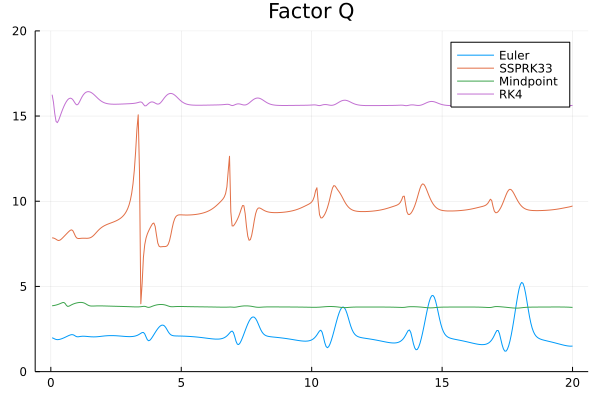

In [25]:
plot(solE_tol.t,map(t -> Q(t,solE_tol,solE2_tol,solE4_tol),solE_tol.t),ylim=(0.0,20.), label="Euler",title= "Factor Q")
plot!(sol33_tol.t,map(t -> Q(t,sol33_tol,sol332_tol,sol334_tol),sol33_tol.t), label="SSPRK33")
plot!(solMind_tol.t,map(t -> Q(t,solMind_tol,solMind2_tol,solMind4_tol),solMind_tol.t), label="Mindpoint")
plot!(solRK4_tol.t,map(t -> Q(t,solRK4_tol,solRK42_tol,solRK44_tol),solRK4_tol.t), label="RK4")
#Notamos que la convergencia es mejor en este problema

###  Atractor de Lorenz ###
Sistema de ec que describe un sistema dinámico determinista tridimensional no lineal derivado de las ecuaciones simplificadas de rollos de convección que se producen en las ecuaciones dinámicas de la atmósfera terrestre.
\begin{equation}
\frac{dx}{dt}=a(y-x)
\end{equation}
\begin{equation}
\frac{dy}{dt}=x(b-z) -y
\end{equation}
\begin{equation}
\frac{dz}{dt}=xy-cz
\end{equation}
En nuestro caso $a=10.$ $b=28.$ y $c=8/3$

In [23]:
function lorenz!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz! (generic function with 1 method)

In [24]:
dt=0.01

0.01

#### Jugamos con el problema

In [25]:
#Datos iniciales
u0 = [1.0;0.0;0.0]
tspan = (0.0,20.0)
prob = ODEProblem(lorenz!,u0,tspan)
sol = solve(prob,adaptive=false,dt=dt)

retcode: Success
Interpolation: specialized 4th order "free" interpolation, specialized 2nd order "free" stiffness-aware interpolation
t: 2001-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.060000000000000005
  0.07
  0.08
  0.09
  0.09999999999999999
  0.10999999999999999
  0.11999999999999998
  ⋮
 19.89000000000031
 19.90000000000031
 19.910000000000313
 19.920000000000314
 19.930000000000316
 19.940000000000317
 19.95000000000032
 19.96000000000032
 19.970000000000322
 19.980000000000324
 19.990000000000325
 20.0
u: 2001-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9179244619166719, 0.26633997121142416, 0.0012639003891454018]
 [0.8679194609229505, 0.5117404148876176, 0.004655461336280941]
 [0.8453602141614959, 0.7446540743667971, 0.009835877706291622]
 [0.8468056335099496, 0.9723322920182826, 0.01673451950167917]
 [0.8697866741874449, 1.2011317449411176, 0.02548619927309708]
 [0.9126412777825029, 1.4367666232981309, 0.03640113331010267]
 [0.9743868418

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


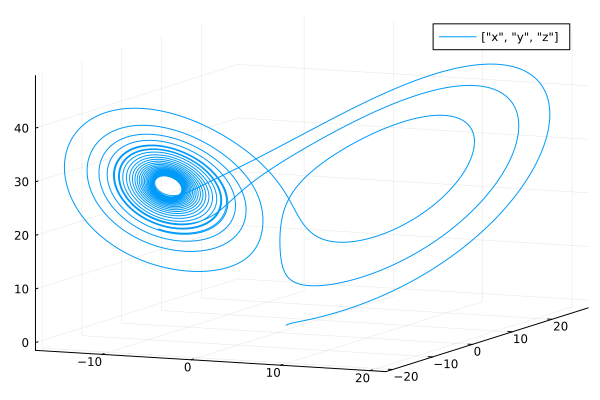

In [26]:
#Ploteamos la trayectoria
plot(sol,vars=(1,2,3),label=["x" ,"y" ,"z"])

In [27]:
prob = ODEProblem(lorenz!,u0,tspan)
solE = solve(prob,Euler(),adaptive=false,dt=dt)
solRK4 = solve(prob,RK4(),adaptive=false,dt=dt)
sol33 = solve(prob,SSPRK33(),adaptive=false,dt=dt)
solMind = solve(prob,  Midpoint(),adaptive=false,dt=dt)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be

retcode: Success
Interpolation: 3rd order Hermite
t: 2001-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.060000000000000005
  0.07
  0.08
  0.09
  0.09999999999999999
  0.10999999999999999
  0.11999999999999998
  ⋮
 19.89000000000031
 19.90000000000031
 19.910000000000313
 19.920000000000314
 19.930000000000316
 19.940000000000317
 19.95000000000032
 19.96000000000032
 19.970000000000322
 19.980000000000324
 19.990000000000325
 20.0
u: 2001-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.919, 0.2646, 0.00133]
 [0.8695650888650001, 0.5088166850363232, 0.004736188982149443]
 [0.847211434190571, 0.7409058909309068, 0.009900099517512943]
 [0.84859872097535, 0.9679704643297509, 0.01676060957356076]
 [0.8713283219395846, 1.1962542586146958, 0.025455347078970708]
 [0.9137856653191397, 1.4313844913228841, 0.03629290432683124]
 [0.9750182788904387, 1.6785730057792705, 0.049747133158181085]
 [1.0546426951643784, 1.9427849789610465, 0.06646859892395006]
 [1.1527747670

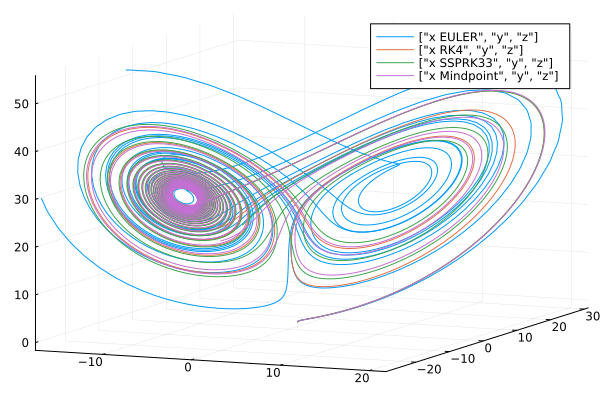

In [28]:
#Ploteamos la trayectoria
plot(solE,vars=(1,2,3),label=["x EULER" ,"y" ,"z"])
plot!(solRK4,vars=(1,2,3),label=["x RK4" ,"y" ,"z"])
plot!(sol33,vars=(1,2,3),label=["x SSPRK33" ,"y" ,"z"])
plot!(solMind,vars=(1,2,3),label=["x Mindpoint" ,"y" ,"z"])

In [29]:
solE2=solve(prob, Euler(), adaptive = false,  dt = dt*0.5,saveat = dt )
solE4=solve(prob, Euler(), adaptive = false,  dt = dt*0.25,saveat = dt)

sol332=solve(prob, SSPRK33(), adaptive = false,  dt = dt*0.5,saveat = dt)
sol334=solve(prob, SSPRK33(), adaptive = false,  dt = dt*0.25,saveat = dt)

solMind2=solve(prob, Midpoint(), adaptive = false,  dt = dt*0.5,saveat = dt)
solMind4=solve(prob, Midpoint(), adaptive = false,  dt = dt*0.25,saveat = dt)

solRK42=solve(prob, RK4(),  dt = dt*0.5,saveat = dt, adaptive = false)
solRK44=solve(prob, RK4(),  dt = dt*0.25,saveat = dt, adaptive = false)

┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be deprecated with the Julia v1.9 release. Please see https://docs.sciml.ai/SciMLBase/stable/interfaces/Solutions/#retcodes for more information
└ @ SciMLBase /home/dani/.julia/packages/SciMLBase/QqtZA/src/retcodes.jl:355
┌ Warning: Backwards compatability support of the new return codes to Symbols will be

retcode: Success
Interpolation: 1st order linear
t: 2001-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1
  0.11
  0.12
  ⋮
 19.89
 19.9
 19.91
 19.92
 19.93
 19.94
 19.95
 19.96
 19.97
 19.98
 19.99
 20.0
u: 2001-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9179244644179572, 0.2663399667063342, 0.0012638968189546723]
 [0.8679194646802045, 0.5117404073127412, 0.004655455577248536]
 [0.8453602182782186, 0.7446540645994528, 0.009835870652477895]
 [0.8468056373338554, 0.9723322805337062, 0.016734511732342767]
 [0.8697866772333475, 1.2011317319168284, 0.025486191164028844]
 [0.9126412796749713, 1.4367666086840107, 0.03640112510505973]
 [0.9743868422664693, 1.6845174050076515, 0.049958133167372444]
 [1.0546229684398756, 1.9494053742785324, 0.06681573360590555]
 [1.153458709241292, 2.2363398124366816, 0.08783855833374692]
 [1.2714596586771088, 2.5502436588240047, 0.11413845884889191]
 [1.4096111533347886, 2.8961613768751553, 0.14713

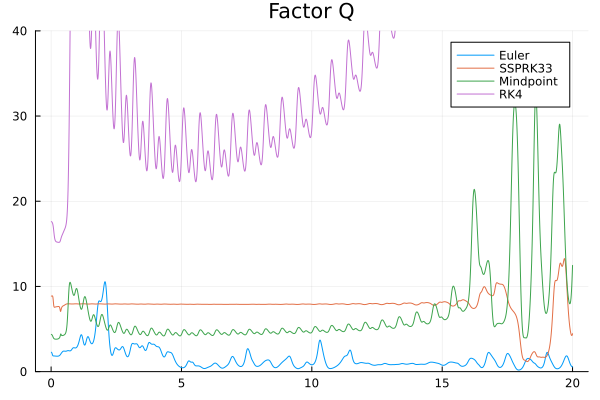

In [30]:
plot(solE.t,map(t -> Q(t,solE,solE2,solE4),solE.t),ylim=(0.0,40.), label="Euler",title= "Factor Q")
plot!(sol33.t,map(t -> Q(t,sol33,sol332,sol334),sol33.t), label="SSPRK33")
plot!(solMind.t,map(t -> Q(t,solMind,solMind2,solMind4),solMind.t), label="Mindpoint")
plot!(solRK4.t,map(t -> Q(t,solRK4,solRK42,solRK44),solRK4.t), label="RK4")

#### Problema con tolerancias 

In [43]:
solE2_tol=solve(prob, Euler(), adaptive = false,  dt = dt,saveat = dt ,reltol=1e-8,abstol=1e-8)
solE2_tol=solve(prob, Euler(), adaptive = false,  dt = dt*0.5,saveat = dt ,reltol=1e-8,abstol=1e-8)
solE4_tol=solve(prob, Euler(), adaptive = false,  dt = dt*0.25,saveat = dt,reltol=1e-8,abstol=1e-8)

sol33_tol=solve(prob, SSPRK33(), adaptive = false,  dt = dt,saveat = dt ,reltol=1e-8,abstol=1e-8)
sol332_tol=solve(prob, SSPRK33(), adaptive = false,  dt = dt*0.5,saveat = dt,reltol=1e-8,abstol=1e-8)
sol334_tol=solve(prob, SSPRK33(), adaptive = false,  dt = dt*0.25,saveat = dt,reltol=1e-8,abstol=1e-8)

solMind_tol=solve(prob, Midpoint(), adaptive = false,  dt = dt,saveat = dt ,reltol=1e-8,abstol=1e-8)
solMind2_tol=solve(prob, Midpoint(), adaptive = false,  dt = dt*0.5,saveat = dt,reltol=1e-8,abstol=1e-8)
solMind4_tol=solve(prob, Midpoint(), adaptive = false,  dt = dt*0.25,saveat = dt,reltol=1e-8,abstol=1e-8)

solRK4_tol=solve(prob, RK4(), adaptive = false,  dt = dt,saveat = dt ,reltol=1e-8,abstol=1e-8)
solRK42_tol=solve(prob, RK4(),  dt = dt*0.5,saveat = dt, adaptive = false,reltol=1e-8,abstol=1e-8)
solRK44_tol=solve(prob, RK4(),  dt = dt*0.25,saveat = dt, adaptive = false,reltol=1e-8,abstol=1e-8)

retcode: Success
Interpolation: 1st order linear
t: 2001-element Vector{Float64}:
  0.0
  0.01
  0.02
  0.03
  0.04
  0.05
  0.06
  0.07
  0.08
  0.09
  0.1
  0.11
  0.12
  ⋮
 19.89
 19.9
 19.91
 19.92
 19.93
 19.94
 19.95
 19.96
 19.97
 19.98
 19.99
 20.0
u: 2001-element Vector{Vector{Float64}}:
 [1.0, 0.0, 0.0]
 [0.9179244644179572, 0.2663399667063342, 0.0012638968189546723]
 [0.8679194646802045, 0.5117404073127412, 0.004655455577248536]
 [0.8453602182782186, 0.7446540645994528, 0.009835870652477895]
 [0.8468056373338554, 0.9723322805337062, 0.016734511732342767]
 [0.8697866772333475, 1.2011317319168284, 0.025486191164028844]
 [0.9126412796749713, 1.4367666086840107, 0.03640112510505973]
 [0.9743868422664693, 1.6845174050076515, 0.049958133167372444]
 [1.0546229684398756, 1.9494053742785324, 0.06681573360590555]
 [1.153458709241292, 2.2363398124366816, 0.08783855833374692]
 [1.2714596586771088, 2.5502436588240047, 0.11413845884889191]
 [1.4096111533347886, 2.8961613768751553, 0.14713

## Problema 4
**Opcional para personas ambiciosas** 
Busque una ecuación que sea stiff y evolucione con un método apropiado. Un caso simple es la ecuación: 

\begin{eqnarray}
u_t &=& v \\
v_t &=& \frac{1}{\epsilon}(u - v)
\end{eqnarray}
con $\epsilon > 0$ muy pequeño. Este permite usar métodos IMEX.